In [2]:
import requests
import apikey

API_KEY = apikey.api_key

movie_id = 550  

url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={API_KEY}&language=pt-BR"

response = requests.get(url)
data = response.json()

if 'title' in data:
    print("Título:", data['title'])
    print("Data de Lançamento:", data['release_date'])
    print("Sinopse:", data['overview'])
    print("Nota Média:", data['vote_average'])
    print("Número de Votos:", data['vote_count'])
else:
    print("Filme não encontrado.")


Título: Clube da Luta
Data de Lançamento: 1999-10-15
Sinopse: Um homem deprimido que sofre de insônia conhece um estranho vendedor de sabonetes chamado Tyler Durden. Eles formam um clube clandestino com regras rígidas onde lutam com outros homens cansados de suas vidas mundanas. Mas sua parceria perfeita é comprometida quando Marla chama a atenção de Tyler.
Nota Média: 8.441
Número de Votos: 28206


In [3]:
import requests
import apikey

API_KEY = apikey.api_key

query = "Miss Jerry"  

url = f"https://api.themoviedb.org/3/search/movie?api_key={API_KEY}&query={query}&language=pt-BR"

response = requests.get(url)
data = response.json()

if 'results' in data and data['results']:
    filme = data['results'][0]  
    print("Título:", filme['title'])
    print("Data de Lançamento:", filme['release_date'])
    print("Sinopse:", filme['overview'])
    print("Nota Média:", filme['vote_average'])
    print("Número de Votos:", filme['vote_count'])
else:
    print("Nenhum filme encontrado com esse nome.")


Título: Miss Jerry
Data de Lançamento: 1894-10-08
Sinopse: The adventures of a female reporter in the 1890s.
Nota Média: 5.0
Número de Votos: 3


In [4]:
import requests
import apikey

API_KEY = apikey.api_key


query = "Miss Jerry" 

url = f"https://api.themoviedb.org/3/search/movie?api_key={API_KEY}&query={query}&language=pt-BR"

response = requests.get(url)
data = response.json()

if 'results' in data and data['results']:
    for filme in data['results']:
        print("ID:", filme['id'])
        print("Título:", filme['title'])
        print("Data de Lançamento:", filme['release_date'])
        print("Sinopse:", filme['overview'])
        print("Nota Média:", filme['vote_average'])
        print("Número de Votos:", filme['vote_count'])
        print()
else:
    print("Nenhum filme encontrado com esse nome.")


ID: 356151
Título: Miss Jerry
Data de Lançamento: 1894-10-08
Sinopse: The adventures of a female reporter in the 1890s.
Nota Média: 5.0
Número de Votos: 3

ID: 40163
Título: A Gata Convencida
Data de Lançamento: 1942-05-30
Sinopse: Tom vai tentar seduzir uma bela gatinha, mas por outro lado, Jerry vai trazer alguns problemas.
Nota Média: 6.72
Número de Votos: 50



In [1]:
import requests
import apikey

API_KEY = apikey.api_key

movie_id = "tt0000009"

url_external_ids = f"https://api.themoviedb.org/3/movie/{movie_id}/external_ids?api_key={API_KEY}&language=pt-BR"

response_external_ids = requests.get(url_external_ids)
data_external_ids = response_external_ids.json()


if response_external_ids.status_code == 200:
    print("IDs externos do filme:")
    print(data_external_ids)
else:
    print("Falha na solicitação. Código de status:", response_external_ids.status_code)


IDs externos do filme:
{'id': 356151, 'imdb_id': 'tt0000009', 'wikidata_id': None, 'facebook_id': None, 'instagram_id': None, 'twitter_id': None}


In [58]:
import requests
import apikey

API_KEY = apikey.api_key

movie_id = "tt0000502"

url_external_ids = f"https://api.themoviedb.org/3/movie/{movie_id}/external_ids?api_key={API_KEY}&language=pt-BR"
#url_external_ids = f"https://api.themoviedb.org/3/find/{movie_id}?api_key={API_KEY}&language=pt-BR&external_source=imdb_id"

response_external_ids = requests.get(url_external_ids)
data_external_ids = response_external_ids.json()

if response_external_ids.status_code == 200:
    print("IDs externos do filme:")
    print(data_external_ids)

    if 'imdb_id' in data_external_ids:
        imdb_id = data_external_ids['imdb_id']

        #url_movie_details = f"https://api.themoviedb.org/3/find/{imdb_id}?api_key={API_KEY}&language=pt-BR&external_source=imdb_id"
        url_movie_details = f"https://api.themoviedb.org/3/movie/{imdb_id}?api_key={API_KEY}&language=pt-BR&external_source=imdb_id"
        response_movie_details = requests.get(url_movie_details)
        data_movie_details = response_movie_details.json()

        if response_movie_details.status_code == 200:
            print("Detalhes do filme:")
            print(data_movie_details)
        else:
            print("Falha na solicitação para obter detalhes do filme.")
    else:
        print("ID IMDb não encontrado nos IDs externos do filme.")
else:
    print("Falha na solicitação. Código de status:", response_external_ids.status_code)


Falha na solicitação. Código de status: 404


In [2]:
import pandas as pd
from datetime import datetime

movies_imdb = pd.read_csv("movies.csv", sep='|')

movies_imdb = movies_imdb.drop_duplicates(subset=['id'])

movies_imdb['genero'] = movies_imdb['genero'].replace('\\N', '')

movies_imdb['anoLancamento'] = movies_imdb['anoLancamento'].replace('\\N', pd.NA)

total_sem_genero = movies_imdb['genero'].eq('').sum()

total_sem_ano_lancamento = movies_imdb['anoLancamento'].isnull().sum()

total_filmes = len(movies_imdb)

movies_imdb['anoLancamento'] = pd.to_datetime(movies_imdb['anoLancamento'], errors='coerce')

ano_atual = datetime.now().year
filmes_filtrados = movies_imdb[
    (movies_imdb['genero'].str.contains('Drama|Romance', regex=True, na=False)) &
    (~movies_imdb['anoLancamento'].isna()) & 
    (movies_imdb['anoLancamento'].dt.year >= ano_atual - 5)
]

total_drama_romance_ultimos_10_anos = len(filmes_filtrados)

print("Total de filmes sem gênero:", total_sem_genero)
print("Total de filmes sem ano de lançamento:", total_sem_ano_lancamento)
print("Total de filmes no conjunto de dados:", total_filmes)
print("Total de filmes do gênero Drama ou Romance dos últimos 10 anos:", total_drama_romance_ultimos_10_anos)


/var/folders/5q/4krf7jmj6fgfll_b9kgmff9r0000gn/T/ipykernel_14866/1688920207.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_imdb = pd.read_csv("movies.csv", sep='|')


Total de filmes sem gênero: 8511
Total de filmes sem ano de lançamento: 40
Total de filmes no conjunto de dados: 244543
Total de filmes do gênero Drama ou Romance dos últimos 10 anos: 13776


In [2]:
import pandas as pd

movies_imdb = pd.read_csv("movies.csv", sep='|')

movies_imdb.head()

/var/folders/5q/4krf7jmj6fgfll_b9kgmff9r0000gn/T/ipykernel_10118/543071593.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_imdb = pd.read_csv("movies.csv", sep='|')


,id,tituloPincipal,tituloOriginal,anoLancamento,tempoMinutos,genero,notaMedia,numeroVotos,generoArtista,personagem,nomeArtista,anoNascimento,anoFalecimento,profissao,titulosMaisConhecidos
0,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.3,200,actress,Miss Geraldine Holbrook (Miss Jerry),Blanche Bayliss,1878,1951,actress,tt0000009
1,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.3,200,actor,Mr. Hamilton,William Courtenay,1875,1933,actor,"tt0021535,tt0000009,tt0020355,tt0020403"
2,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.3,200,actor,Chauncey Depew - the Director of the New York ...,Chauncey Depew,1834,1928,"actor,writer","tt1076833,tt0490842,tt0000009,tt4484306"
3,tt0000502,Bohemios,Bohemios,1905,100,\N,4.2,14,actor,\N,Antonio del Pozo,\N,\N,actor,tt0000502
4,tt0000502,Bohemios,Bohemios,1905,100,\N,4.2,14,actor,\N,El Mochuelo,\N,\N,actor,tt0000502


In [3]:
import json

# Carregar o JSON
with open('filmes.json', 'r') as f:
    data = json.load(f)

# Inicializar contadores
total_brasileiros = 0
total_com_orcamento = 0

# Percorrer os filmes
for filme in data:
    # Verificar se o filme é brasileiro
    if any(country['iso_3166_1'] == 'BR' for country in filme['production_countries']):
        total_brasileiros += 1

    # Verificar se o filme tem orçamento especificado
    if filme['budget'] > 0:
        total_com_orcamento += 1

# Imprimir resultados
print("Total de filmes brasileiros:", total_brasileiros)
print("Total de filmes com orçamento especificado:", total_com_orcamento)


Total de filmes brasileiros: 35
Total de filmes com orçamento especificado: 232


In [4]:
import json

# Carregar o JSON
with open('filmes.json', 'r') as f:
    data = json.load(f)

# Inicializar contadores
total_brasileiros = 0
total_com_orcamento = 0

# Percorrer os filmes
for filme in data:
    # Verificar se o filme é brasileiro
    if any(country['iso_3166_1'] == 'BR' for country in filme['production_countries']):
        total_brasileiros += 1

    # Verificar se o filme tem orçamento especificado
    if filme['budget'] > 0:
        total_com_orcamento += 1

# Imprimir resultados linha por linha
print("Total de filmes brasileiros:", total_brasileiros)
print("Total de filmes com orçamento especificado:", total_com_orcamento)


Total de filmes brasileiros: 35
Total de filmes com orçamento especificado: 232


In [5]:
import json

# Carregar o JSON
with open('filmes.json', 'r') as f:
    data = json.load(f)

# Inicializar listas e contadores
filmes_brasileiros = []
filmes_com_orcamento = []

# Percorrer os filmes
for filme in data:
    # Verificar se o filme é brasileiro
    if any(country['iso_3166_1'] == 'BR' for country in filme['production_countries']):
        filmes_brasileiros.append(filme)

    # Verificar se o filme tem orçamento especificado
    if filme['budget'] > 0:
        filmes_com_orcamento.append(filme)

# Imprimir lista de filmes brasileiros e contagem
print("Filmes brasileiros:")
for filme in filmes_brasileiros:
    print(filme['title'])

print("Total de filmes brasileiros:", len(filmes_brasileiros))

# Imprimir lista de filmes com orçamento especificado e contagem
print("\nFilmes com orçamento especificado:")
for filme in filmes_com_orcamento:
    print(filme['title'])

print("Total de filmes com orçamento especificado:", len(filmes_com_orcamento))


Filmes brasileiros:
Predestinado: Arigó e o Espírito do Dr. Fritz
Transe
Armageddon Time
Los de abajo
Pornomelancolía
Velha Roupa Colorida
Paloma
Tinnitus
O Segundo Homem
Casa Flutuante
Derrapada
Fogaréu
Júpiter
O Pastor e o Guerrilheiro
Bem-Vinda, Violeta
Regra 34
Depois do Universo
Marte Um
Inverno
A Mãe
Noites Alienígenas
Sem fôlego
Maputo Nakuzandza
O Rio do Desejo
Amado
Boys on Film 22: Love to Love You
Coisa Pública
Carvão
Nada é por Acaso
O Acidente
Saudade Fez Morada Aqui Dentro
Duetto
Alemão 2
Serial Kelly
Pureza
Total de filmes brasileiros: 35

Filmes com orçamento especificado:
लाल सिंह चड्ढा
A Voz do Empoderamento
Nada de Novo no Front
Até os Ossos
Operação Cerveja
Amsterdam
Svetlonoc
Armageddon Time
Cerdita
Volvió
Oliverio y la piscina
Maigret e a Jovem Morta
Reféns da Noite
K.G.F: Capítulo 2
Não Se Preocupe, Querida
Shin Ultraman
হাওয়া
The Curse of Professor Zardonicus
Thallumaala
Fragile Heart
O Homem do Norte
Zillion
Dog - A Aventura de Uma Vida
Trivikrama
A Touch of V

In [7]:
import json

# Carregar o JSON
with open('filmes.json', 'r') as f:
    data = json.load(f)

# Inicializar lista
filmes_com_avaliacao_e_orcamento = []

# Percorrer os filmes
for filme in data:
    # Verificar se o filme tem avaliação e orçamento
    if filme['vote_average'] > 0 and filme['budget'] > 0:
        filmes_com_avaliacao_e_orcamento.append({
            'nome': filme['title'],
            'orçamento': filme['budget'],
            'avaliação': filme['vote_average']
        })

# Imprimir lista de filmes com avaliação e orçamento
print("Filmes com avaliação e orçamento:")
for filme in filmes_com_avaliacao_e_orcamento:
    print("Nome:", filme['nome'])
    print("Orçamento:", filme['orçamento'])
    print("Avaliação:", filme['avaliação'])
    print()

print("Total de filmes com avaliação e orçamento:", len(filmes_com_avaliacao_e_orcamento))


Filmes com avaliação e orçamento:
Nome: लाल सिंह चड्ढा
Orçamento: 23000000
Avaliação: 6.483

Nome: A Voz do Empoderamento
Orçamento: 12000000
Avaliação: 7.4

Nome: Nada de Novo no Front
Orçamento: 20000000
Avaliação: 7.732

Nome: Até os Ossos
Orçamento: 18000000
Avaliação: 7.1

Nome: Operação Cerveja
Orçamento: 2800000
Avaliação: 7.6

Nome: Amsterdam
Orçamento: 80000000
Avaliação: 6.061

Nome: Svetlonoc
Orçamento: 1720000
Avaliação: 5.853

Nome: Armageddon Time
Orçamento: 15000000
Avaliação: 6.543

Nome: Cerdita
Orçamento: 2400000
Avaliação: 6.657

Nome: Oliverio y la piscina
Orçamento: 837924
Avaliação: 6.2

Nome: Maigret e a Jovem Morta
Orçamento: 7000000
Avaliação: 5.83

Nome: Reféns da Noite
Orçamento: 1000000
Avaliação: 6.367

Nome: K.G.F: Capítulo 2
Orçamento: 13000000
Avaliação: 7.459

Nome: Não Se Preocupe, Querida
Orçamento: 35000000
Avaliação: 6.793

Nome: Shin Ultraman
Orçamento: 5500000
Avaliação: 7.139

Nome: হাওয়া
Orçamento: 94606
Avaliação: 6.6

Nome: The Curse of Profe

In [34]:
import pandas as pd 

movies_imdb = pd.read_csv("movies.csv", sep='|')

# Remover linhas duplicadas
movies_imdb = movies_imdb.drop_duplicates(subset=['id'])

movies_imdb.head()

/var/folders/5q/4krf7jmj6fgfll_b9kgmff9r0000gn/T/ipykernel_11780/764652118.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_imdb = pd.read_csv("movies.csv", sep='|')


,id,tituloPincipal,tituloOriginal,anoLancamento,tempoMinutos,genero,notaMedia,numeroVotos,generoArtista,personagem,nomeArtista,anoNascimento,anoFalecimento,profissao,titulosMaisConhecidos
0,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.3,200,actress,Miss Geraldine Holbrook (Miss Jerry),Blanche Bayliss,1878,1951,actress,tt0000009
3,tt0000502,Bohemios,Bohemios,1905,100,\N,4.2,14,actor,\N,Antonio del Pozo,\N,\N,actor,tt0000502
5,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,797,actress,Kate Kelly,Elizabeth Tait,1879,\N,actress,tt0000574
9,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama,5.1,20,actor,\N,Henri Gouget,\N,\N,actor,"tt3752844,tt0451296,tt0311681,tt0400955"
13,tt0000615,Robbery Under Arms,Robbery Under Arms,1907,\N,Drama,4.3,23,actress,\N,Rhoda Dendron,1884,1970,actress,tt0000615


In [36]:
# contar total de filmes separados por gênero
total_por_genero = movies_imdb['genero'].value_counts()


#transformar coluna ano em inteiro

movies_imdb['anoLancamento'] = pd.to_numeric(movies_imdb['anoLancamento'], errors='coerce')


#contar filmes de drama dos ultimos 10 anos
ano_atual = 2024
total_drama_ultimos_10_anos = movies_imdb[
    (movies_imdb['genero'].str.contains('Drama', regex=False, na=False)) &
    (movies_imdb['anoLancamento'] >= ano_atual - 3)
].shape[0]

print("Total de filmes de drama dos últimos 10 anos:", total_drama_ultimos_10_anos)


Total de filmes de drama dos últimos 10 anos: 5782


In [38]:
import json

# Carregar o arquivo JSON
with open('filmes.json', 'r') as file:
    data = json.load(file)


In [39]:
# Filtrar os filmes de drama
filmes_drama = [filme for filme in data if any(genero['name'] == 'Drama' for genero in filme['genres'])]


In [40]:
from collections import defaultdict

# Agrupar filmes por país/região
filmes_por_pais = defaultdict(list)
for filme in filmes_drama:
    for pais in filme['production_countries']:
        filmes_por_pais[pais['name']].append(filme)

# Calcular a média de popularidade por país/região
media_popularidade_por_pais = {}
for pais, filmes in filmes_por_pais.items():
    popularidades = [filme['popularity'] for filme in filmes]
    media_popularidade_por_pais[pais] = sum(popularidades) / len(popularidades)

# Calcular a média de pontuação por país/região
media_pontuacao_por_pais = {}
for pais, filmes in filmes_por_pais.items():
    pontuacoes = [filme['vote_average'] for filme in filmes]
    media_pontuacao_por_pais[pais] = sum(pontuacoes) / len(pontuacoes)

# Exibir resultados
for pais in media_popularidade_por_pais:
    print(f"País/Região: {pais}")
    print(f"Média de Popularidade: {media_popularidade_por_pais[pais]}")
    print(f"Média de Pontuação: {media_pontuacao_por_pais[pais]}\n")


País/Região: Brazil
Média de Popularidade: 3.9019666666666666
Média de Pontuação: 4.651533333333333

País/Região: Philippines
Média de Popularidade: 9.692599999999997
Média de Pontuação: 4.45137142857143

País/Região: Italy
Média de Popularidade: 7.439707317073172
Média de Pontuação: 5.6612682926829265

País/Região: Poland
Média de Popularidade: 10.715568181818181
Média de Pontuação: 5.542795454545455

País/Região: United States of America
Média de Popularidade: 14.468496083550914
Média de Pontuação: 5.317456919060055

País/Região: India
Média de Popularidade: 3.930799283154122
Média de Pontuação: 5.009247311827955

País/Região: Bulgaria
Média de Popularidade: 2.9163750000000004
Média de Pontuação: 4.4401875

País/Região: Denmark
Média de Popularidade: 10.502071428571426
Média de Pontuação: 6.6655000000000015

País/Região: Greece
Média de Popularidade: 8.209333333333332
Média de Pontuação: 4.655722222222223

País/Região: Serbia
Média de Popularidade: 2.76538888888889
Média de Pontuação

In [41]:
# Filtrar os filmes alemães
filmes_alemaes = [filme for filme in data if any(pais['name'] == 'Germany' for pais in filme['production_countries'])]

# Calcular a média de popularidade dos filmes alemães
media_popularidade_alemaes = sum(filme['popularity'] for filme in filmes_alemaes) / len(filmes_alemaes)

# Calcular a média de pontuação dos filmes alemães
media_pontuacao_alemaes = sum(filme['vote_average'] for filme in filmes_alemaes) / len(filmes_alemaes)

# Exibir os resultados
print(f"Média de Popularidade dos Filmes Alemães: {media_popularidade_alemaes}")
print(f"Média de Pontuação dos Filmes Alemães: {media_pontuacao_alemaes}")

Média de Popularidade dos Filmes Alemães: 7.018429906542055
Média de Pontuação dos Filmes Alemães: 5.355121495327103


In [42]:

# Filtrar os filmes alemães
filmes_alemaes = [filme for filme in data if any(pais['name'] == 'Germany' for pais in filme['production_countries'])]

# Ordenar os filmes alemães por popularidade
filmes_alemaes_populares = sorted(filmes_alemaes, key=lambda x: x['popularity'], reverse=True)

# Exibir os 5 filmes alemães mais populares
print("Os 5 filmes alemães mais populares:")
for filme in filmes_alemaes_populares[:5]:
    print(filme['title'], '-', filme['popularity'])

# Ordenar os filmes alemães por pontuação média
filmes_alemaes_avaliados = sorted(filmes_alemaes, key=lambda x: x['vote_average'], reverse=True)

# Exibir os 5 filmes alemães mais bem avaliados
print("\nOs 5 filmes alemães mais bem avaliados:")
for filme in filmes_alemaes_avaliados[:5]:
    print(filme['title'], '-', filme['vote_average'])


Os 5 filmes alemães mais populares:
Nada de Novo no Front - 73.011
Triângulo da Tristeza - 41.205
TÁR - 38.005
Holy Spider - 29.229
Rogue Agent - 20.701

Os 5 filmes alemães mais bem avaliados:
Runner - 10.0
Alle reden übers Wetter - 8.0
Wir sind dann wohl die Angehörigen - 8.0
Szelíd - 8.0
Unicorn Town - 8.0


/Users/jorgechiozzini/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


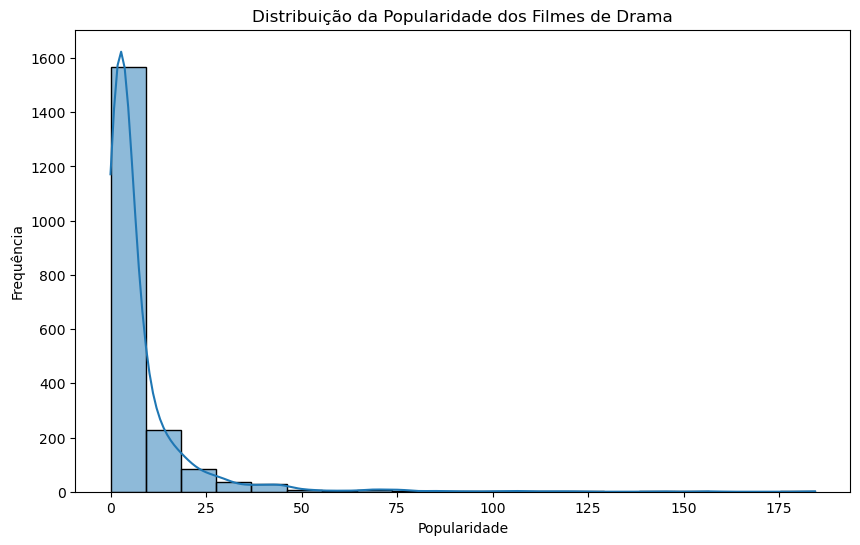

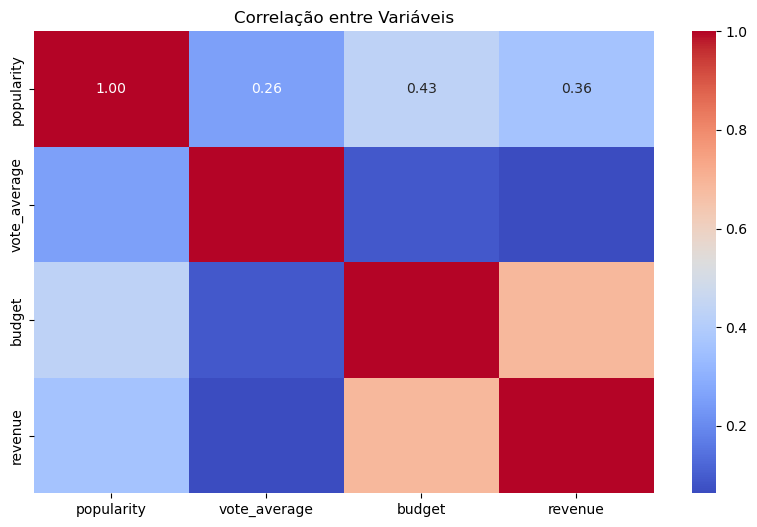

/Users/jorgechiozzini/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jorgechiozzini/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jorgechiozzini/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jorgechiozzini/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

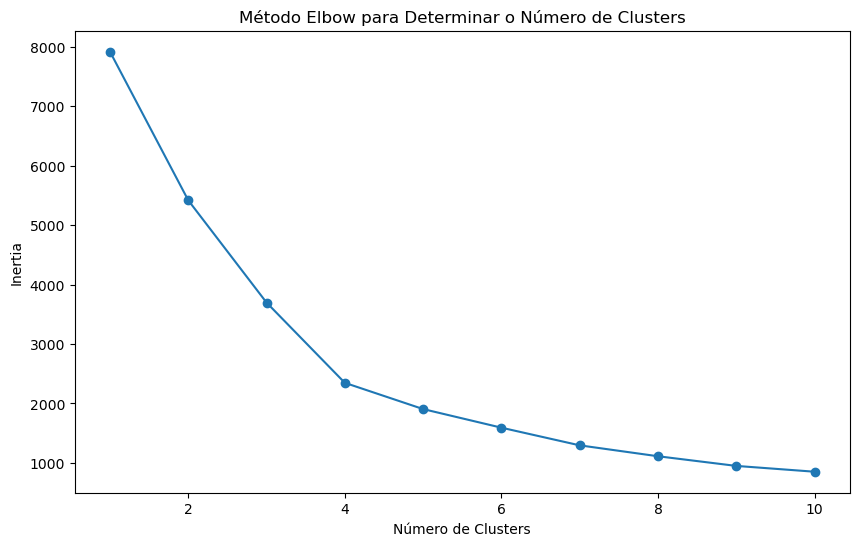

/Users/jorgechiozzini/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jorgechiozzini/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jorgechiozzini/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jorgechiozzini/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated an

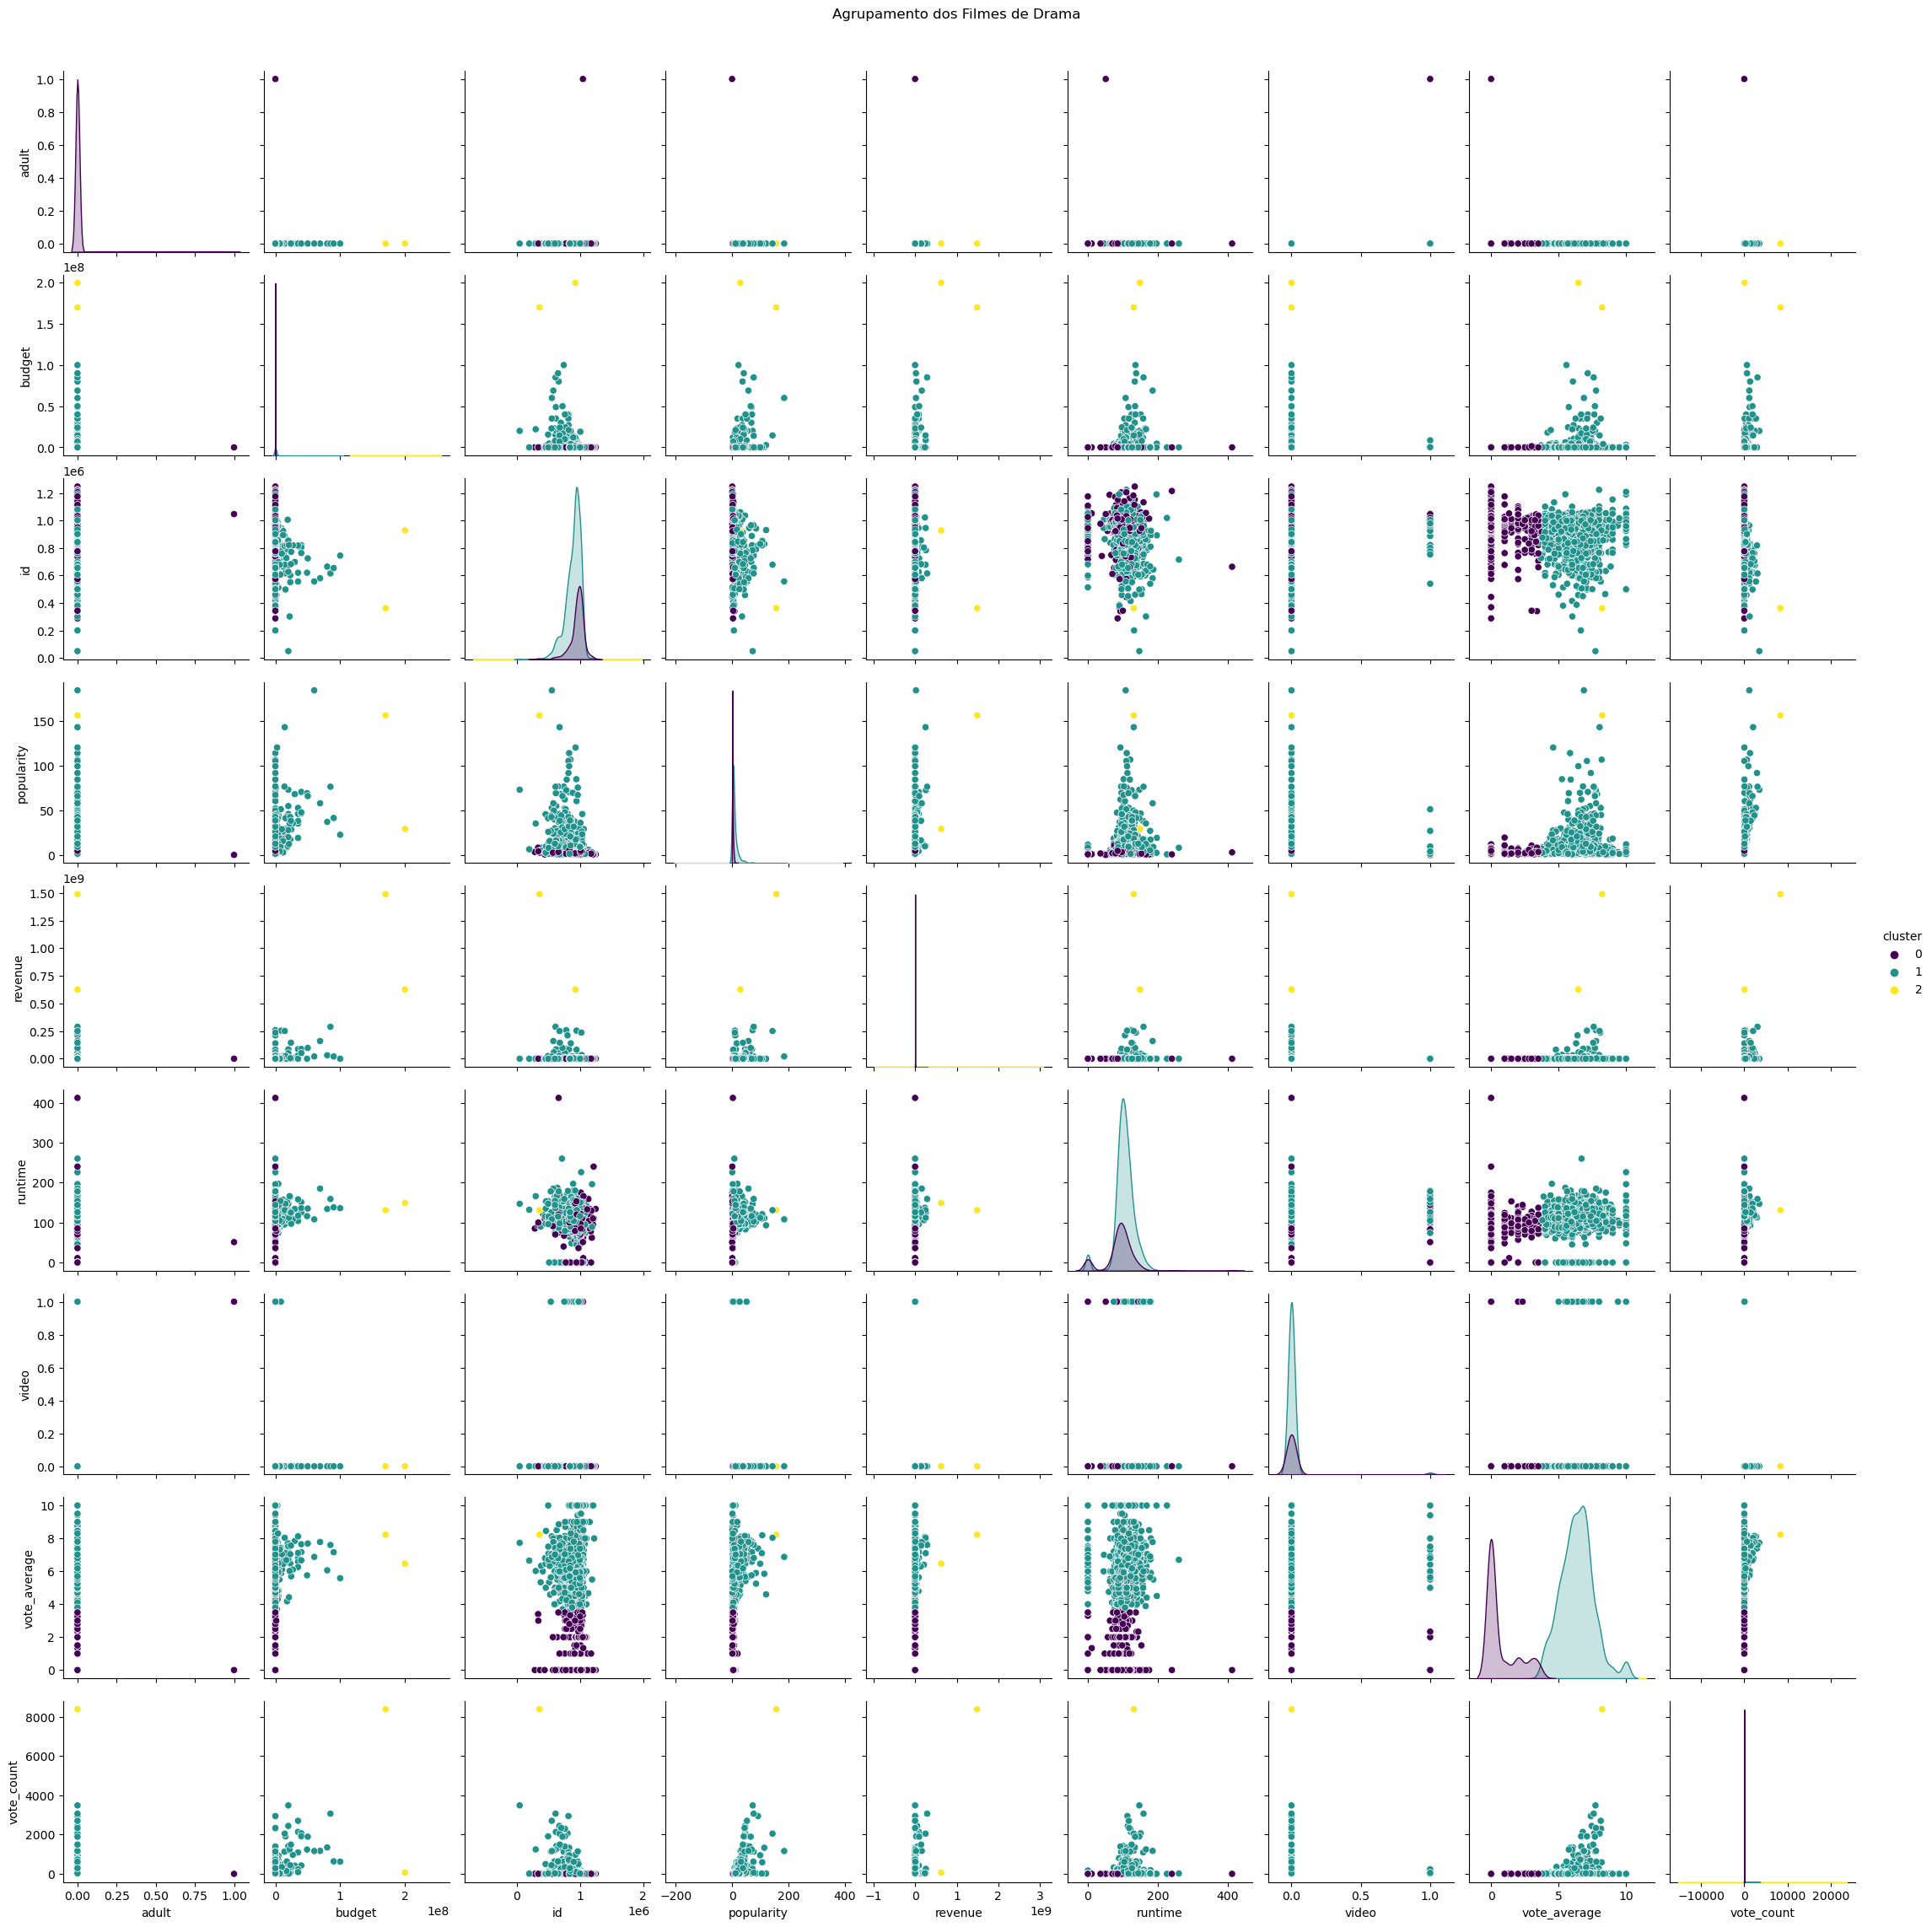

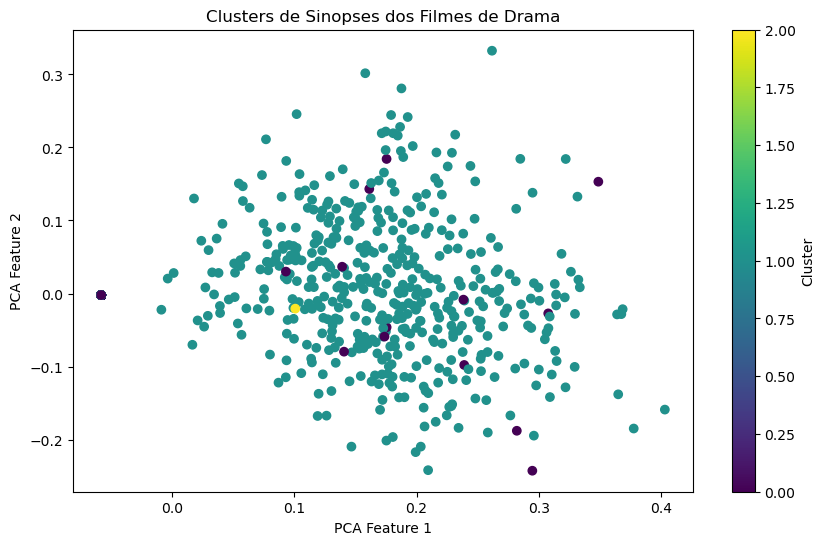

MSE: 583101303316593.9


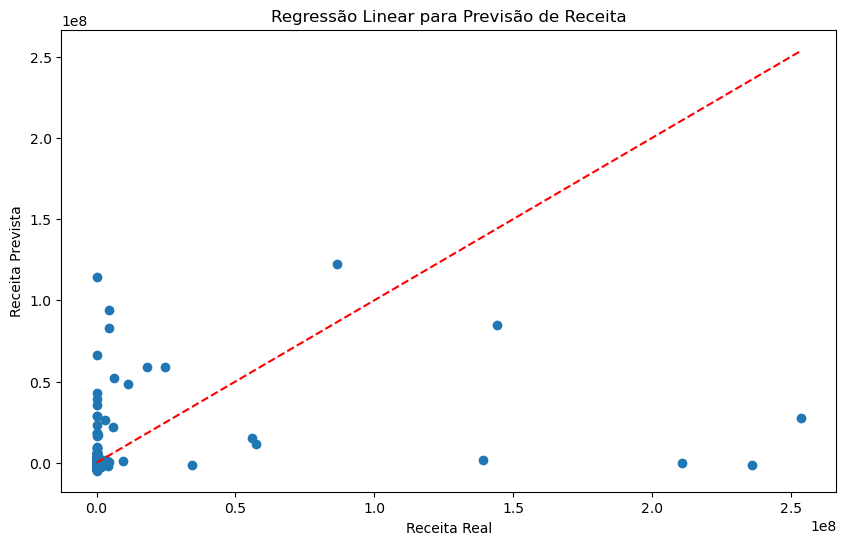

In [44]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Converter dados para DataFrame do Pandas
df = pd.DataFrame(data)

# Filtrar apenas os filmes de drama
filmes_drama = df[df['genres'].apply(lambda x: any(gen['name'] == 'Drama' for gen in x))]

# Limpeza e preparação dos dados
# Tratamento de valores ausentes
filmes_drama = filmes_drama.dropna(subset=['popularity', 'vote_average', 'budget', 'revenue'])

# Análise descritiva
# Distribuição da popularidade
plt.figure(figsize=(10, 6))
sns.histplot(filmes_drama['popularity'], bins=20, kde=True)
plt.title('Distribuição da Popularidade dos Filmes de Drama')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.show()

# Correlação entre variáveis
correlation_matrix = filmes_drama[['popularity', 'vote_average', 'budget', 'revenue']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Variáveis')
plt.show()

# Análise de agrupamento (clustering)
# Normalização das variáveis
scaler = StandardScaler()
scaled_features = scaler.fit_transform(filmes_drama[['popularity', 'vote_average', 'budget', 'revenue']])

# Determinar o número de clusters usando o método Elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método Elbow para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

# Aplicar KMeans com o número de clusters determinado
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
filmes_drama['cluster'] = kmeans.labels_

# Visualizar clusters
sns.pairplot(filmes_drama, hue='cluster', palette='viridis')
plt.suptitle('Agrupamento dos Filmes de Drama', y=1.02)
plt.show()

# Análise de sentimento
# Vectorization das sinopses
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(filmes_drama['overview'].fillna(''))

# Redução de dimensionalidade com PCA
pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(tfidf_matrix.toarray())

# Visualizar clusters de sinopses
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters de Sinopses dos Filmes de Drama')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# Modelagem preditiva (exemplo simplificado)
# Divisão dos dados em conjunto de treino e teste
from sklearn.model_selection import train_test_split

X = filmes_drama[['popularity', 'vote_average', 'budget']]
y = filmes_drama['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regressão linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Visualização dos resultados da regressão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Regressão Linear para Previsão de Receita')
plt.xlabel('Receita Real')
plt.ylabel('Receita Prevista')
plt.show()
